In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

from keras.utils import to_categorical
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt


#Load original cifar10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [22]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


There are 50,000 images for training. The test size is 10,000 images. That is a total dataset size of 60,000 images.
This given shape of the images (32,32,3) is the adequate for training a neural network. However, for other algorithms, like kNN for instance, each sample should be flattened to a 32x32x3 array.

We start studying the labels to understand how many classes there are

In [18]:
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


There are 10 classes. According to the cifar-10 dataset description, this means 5,000 images for each class in the training dataset, and 1,000 for each class in the test set. We will change these single scalar values to float categorical values, because we want the models to predict the probability of being in a class.

In [35]:
train_labels_c = to_categorical(train_labels)
test_labels_c = to_categorical(test_labels)

print(train_labels_c.shape)
print(test_labels_c.shape)

print(train_labels[0,:])
print(train_labels_c[0,:])

(50000, 10)
(10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Now we will get the max, min and standard deviation of all the pixels of all images to do a proper rescaling of the data

In [19]:
max_train = np.amax(train_images)
max_test  = np.amax(test_images)

min_train = np.amin(train_images)
min_test = np.amin(test_images)

sdev_train = np.std(train_images)
sdev_test = np.std(test_images)

print("Max of training data:\t", max_train)
print("Max of test data:\t", max_test)
print("Min of training data:\t",min_train)
print("Min of test data:\t",min_test)
print("Std deviation of training data\t", sdev_train)
print("Std deviation of test data\t", sdev_test)

Max of training data:	 255
Max of test data:	 255
Min of training data:	 0
Min of test data:	 0
Std deviation of training data	 64.1500758911213
Std deviation of test data	 64.06097012299574


We will then divide the entire images dataset by 255 so that the algorithms works in the range 0 - 1. This is adequate because, for instance, when training a neural network, activation functions such as logistic output values between 0 and 1. Moreover, we also change the labels to being categorical. Therefore, we expect the algorithm to work better if the input data is also in the same scale.

In [20]:
train_images_r = train_images / 255
test_images_r = test_images / 255

In [21]:
max_train = np.amax(train_images_r)
max_test  = np.amax(test_images_r)

min_train = np.amin(train_images_r)
min_test = np.amin(test_images_r)

sdev_train = np.std(train_images_r)
sdev_test = np.std(test_images_r)

print("Max of training data:\t", max_train)
print("Max of test data:\t", max_test)
print("Min of training data:\t",min_train)
print("Min of test data:\t",min_test)
print("Std deviation of training data\t", sdev_train)
print("Std deviation of test data\t", sdev_test)

Max of training data:	 1.0
Max of test data:	 1.0
Min of training data:	 0.0
Min of test data:	 0.0
Std deviation of training data	 0.25156892506322026
Std deviation of test data	 0.2512194906784146


Now we will explore what the images look like and that the labels correspond to the right class. The original label data, according to the CIFAR 10 dataset is:

0 - airplane /
1 - automobile
/2 - bird
/3 - cat
/4 - deer
/5 - dog
/6 - frog
/7 - horse
/8 - ship
/9 - truck

In [50]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse", "ship", "truck"]

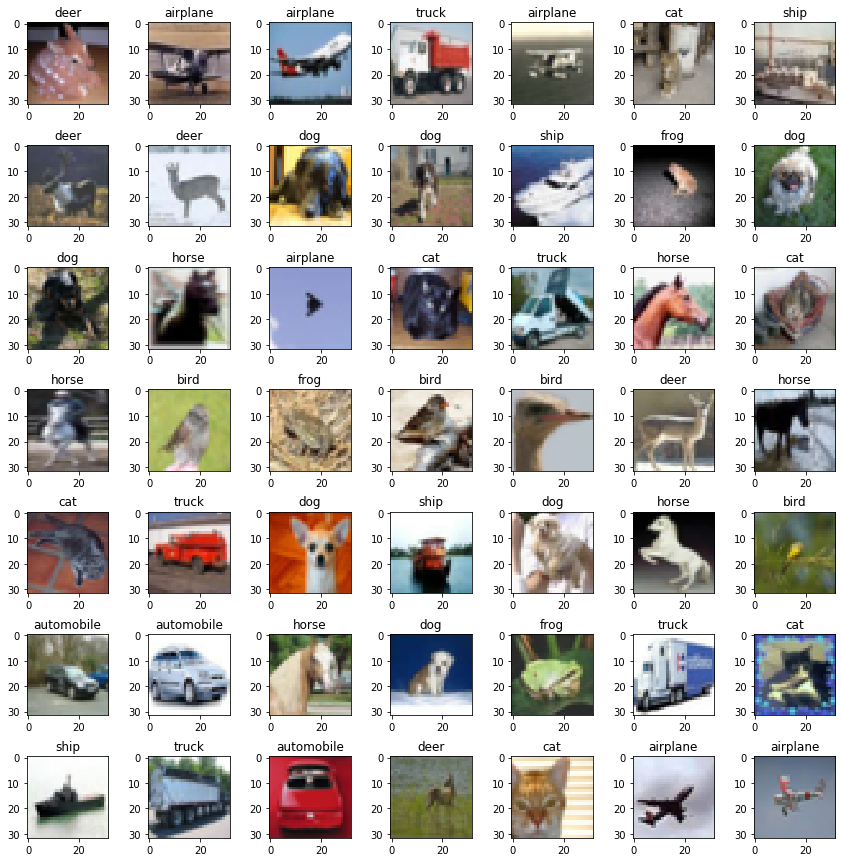

In [49]:
from random import randrange

size=7
fig, ax = plt.subplots(size,size, figsize= (15,15))
fig.subplots_adjust(hspace = .5, wspace=.1)
for i in range(size):
    for j in range(size):
        n = randrange(train_images.shape[0])
        sample_image = train_images[n]
        sample_label = train_labels[n]
        className = classes[int(sample_label)]
        ax[i,j].imshow(sample_image)
        ax[i,j].set_title(className)
    
plt.show()
    

From the training dataset we generated this graph in order to visualize 47 random samples. We see that all labels are associated accurately.

Something we can notice from the data, if we compare 2 cat or bird pictures for instance, is that some samples are zoomed while others are not. Moreover, airplane pictures show that the direction of the airplane can change from sample to sample, i.e., the algorithm must understand rotation. From the dog pictures, we conclude that the algorithm must also understand horizontal and vertical shifts.

All these differences in in-class samples indicate that at some point of our classification algorithm design, developing a data augmentation including rotation, zooming, etc., might be a good idea to improve the accuracy on the test set. 